In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [52]:
data = pd.read_csv('Hostel.csv')

In [110]:
ratingBandMapper = {
    'Superb' : 4,
    'Fabulous' : 3,
    'Very Good': 2,
    'Rating' : 0,
    'Good' : 1
}

In [35]:
data.dropna(subset = ["rating.band"], inplace=True)
dataX = data.filter(items=['price.from', 'Distance', 'summary.score', 'atmosphere', 'cleanliness', 'facilities', 'location.y', 'security', 'staff', 'valueformoney'])
dataY = data.filter(items=['rating.band'])

In [181]:
pre = dict(zip(dataX.index, dataX.Distance))
for i in pre:
    pre[i] = [float(pre[i].replace('km from city centre', ''))]

In [36]:
pra = dict(zip(dataY.index, dataY['rating.band']))
for i in pra:
    pra[i] = [ratingBandMapper[pra[i]]]

In [183]:
newDataX = pd.DataFrame.from_dict(pre, orient='index', columns=['Distance'])
dataX.update(newDataX)
dataY = pd.DataFrame.from_dict(pra, orient='index', columns=['rating.band'])

In [112]:
data = pd.read_csv('Hostel.csv')
data.dropna(subset = ["rating.band"], inplace=True)
pre = dict(zip(data.index, data.Distance))
for i in pre:
    pre[i] = [float(pre[i].replace('km from city centre', ''))]
pra = dict(zip(data.index, data['rating.band']))
for i in pra:
    pra[i] = [ratingBandMapper[pra[i]]]
pro = dict(zip(data.index, data['price.from']))
for i in pro:
    if pro[i] < 10000:
        pro[i] = [pro[i]]
    else:
        pro[i] = [pro[i] - 1000000]
newData = pd.DataFrame.from_dict(pre, orient='index', columns=['Distance'])
dataY = pd.DataFrame.from_dict(pra, orient='index', columns=['rating.band'])
newPro = pd.DataFrame.from_dict(pro, orient='index', columns=['price.from'])
data.update(newData)
data.update(dataY)
data.update(newPro)


In [83]:
data

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,4,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7,9.5,4,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,3,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7,7.4,2,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,4,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,338,YADOYA Guesthouse Green,Tokyo,2300,2.6,8.2,3,7.9,7.7,6.9,8.9,8.9,8.8,8.3,139.668125,35.702908
338,339,YADOYA Guesthouse Orange,Tokyo,2000,2.9,8.9,3,8.6,9.0,7.8,9.4,9.0,9.2,9.4,139.667695,35.706513
339,340,YAWP! backpackers,Tokyo,2500,17.5,9.3,4,9.5,9.3,9.4,8.5,9.5,9.2,9.6,139.869197,35.752885
340,341,You En Me House,Kyoto,2800,2.4,8.0,3,7.3,8.0,6.7,8.0,8.7,10.0,7.3,135.749063,34.997376


<AxesSubplot:xlabel='valueformoney', ylabel='rating.band'>

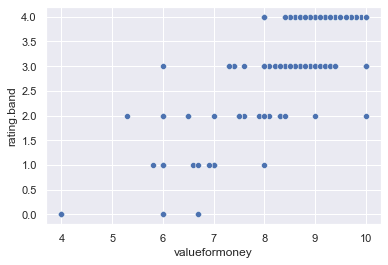

In [123]:
sns.scatterplot(data=data, x="valueformoney", y="rating.band")

In [232]:
dx_list

[[3300, 2.9, 9.2, 8.9, 9.4, 9.3, 8.9, 9.0, 9.4, 9.4],
 [2600, 0.7, 9.5, 9.4, 9.7, 9.5, 9.7, 9.2, 9.7, 9.5],
 [3600, 7.8, 8.7, 8.0, 7.0, 9.0, 8.0, 10.0, 10.0, 9.0],
 [2600, 8.7, 7.4, 8.0, 7.5, 7.5, 7.5, 7.0, 8.0, 6.5],
 [1500, 10.5, 9.4, 9.5, 9.5, 9.0, 9.0, 9.5, 10.0, 9.5],
 [2100, 9.4, 7.0, 5.5, 8.0, 6.0, 6.0, 8.5, 8.5, 6.5],
 [3300, 16.5, 9.3, 8.7, 9.7, 9.3, 9.1, 9.3, 9.7, 8.9],
 [2000, 1.6, 9.5, 8.8, 9.9, 9.2, 9.6, 9.8, 9.8, 9.5],
 [2200, 3.0, 7.7, 6.7, 7.2, 6.8, 8.5, 7.8, 8.5, 8.1],
 [1600, 9.7, 9.2, 9.5, 9.1, 8.7, 8.8, 8.9, 9.8, 9.5],
 [2000, 10.6, 8.5, 8.1, 8.3, 8.4, 7.8, 8.9, 9.1, 8.9],
 [2200, 8.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0],
 [2900, 2.2, 9.3, 9.1, 9.5, 8.8, 9.5, 9.4, 9.7, 9.0],
 [2000, 8.9, 9.1, 8.8, 9.2, 8.7, 9.0, 9.1, 9.5, 9.2],
 [1800, 9.5, 9.1, 8.8, 9.1, 9.0, 9.2, 9.3, 9.3, 9.2],
 [2700, 1.9, 9.0, 8.7, 9.2, 8.9, 8.8, 9.1, 9.2, 9.0],
 [2400, 10.5, 8.3, 8.2, 8.1, 7.7, 7.9, 9.1, 9.0, 8.3],
 [1600, 10.0, 7.8, 7.9, 6.2, 7.0, 9.0, 8.2, 8.0, 8.3],
 [1300, 9.3,

In [184]:
dx_list = dataX.values.tolist()
dy_list = dataY.values.tolist()
x = np.array(dx_list)
y = np.array(dy_list)
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.8035993247155365

In [191]:
reg.predict(np.array([[2600, 8.7, 7.4, 8.0, 7.5, 7.5, 7.5, 7.0, 8.0, 6.5]]))

array([[1.86581706]])

In [214]:
def floatToRating(a):
    out = ['Superb',
    'Fabulous',
    'Very Good',
    'Rating',
    'Good']
    b = int(a)
    c = b + 1
    if a - b > c - a :
        a = c 
    else: 
        a = b
    return out[a]

In [224]:
target_arr = [2100, 9.4, 7.0, 5.5, 8.0, 6.0, 6.0, 8.5, 8.5, 6.5]

In [225]:
floatToRating(reg.predict(np.array([target_arr])).tolist()[0][0])

'Very Good'